In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

from sa_decomp_layer import SADecompLayer

import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #disables GPU 
import matplotlib.pyplot as plt
import numpy as np
#tf.__version__
from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

plt.rcParams['figure.figsize'] = [10,10]
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K


from tensorflow.keras.layers import Layer
from tensorflow.image import flip_up_down, flip_left_right, rot90
from tensorflow.compat.v1 import extract_image_patches
import numpy as np

from keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential, load_model


In [2]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.ndimage import rotate

#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

def load_img(img_path,img_shape, preprocess=True, angle=0):
    
    img_rows=img_shape[0]
    img_cols=img_shape[1]
    #num_channel=img_shape[2]


    img = image.load_img(img_path , target_size=(img_rows, img_cols))    
    img = rotate(img, angle, reshape=False)
    if preprocess:
        img = image.img_to_array(img) 
        img = np.expand_dims(img, axis=0)

        img =  preprocess_input(img)
        return img

    #data = np.array(data)
    #data = data.astype('float32')
    #data /= 255
    #labels=np.array(labels)
    #print('data shape',data.shape)
    #print('labels shape',labels.shape)
    return np.array(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
[[[ 2.61653610e+07+0.j  1.60453500e+05+0.j  1.60453500e+05+0.j]
  [ 4.53172398e+06+0.j -6.46102291e+04+0.j -1.25907538e+05+0.j]
  [ 1.25845256e+06+0.j -2.72822065e+04+0.j  3.36421733e+04+0.j]
  ...
  [-3.66045487e+04+0.j  1.61172728e+04+0.j  3.42455562e+04+0.j]
  [ 1.25845256e+06+0.j  3.36421733e+04+0.j -2.72822065e+04+0.j]
  [ 4.53172398e+06+0.j -1.25907538e+05+0.j -6.46102291e+04+0.j]]

 [[ 5.62355158e+06+0.j -9.90378260e+04+0.j -2.27137122e+04+0.j]
  [-2.78491065e+06+0.j  8.07864208e+04+0.j  5.41340543e+04+0.j]
  [-1.27836338e+05+0.j -2.32496207e+04+0.j -2.46435640e+04+0.j]
  ...
  [-7.88603313e+05+0.j -3.62114636e+04+0.j -2.77771005e+04+0.j]
  [-3.61876290e+05+0.j  3.33890045e+04+0.j  7.53337021e+04+0.j]
  [-1.64379684e+05+0.j  2.64744699e+04+0.j -6.36592856e+04+0.j]]

 [[-1.08328699e+06+0.j  2.44096623e+04+0.j -2.63081288e+04+0.j]
  [-1.88817976e+06+0.j -2.48283744e+03+0.j -1.80123553e+04+0.j]
  [ 1.59648978e+06+0.j -4.77173196e+04+0.j  8.25067318e+02+0.j]
  ...
  [ 

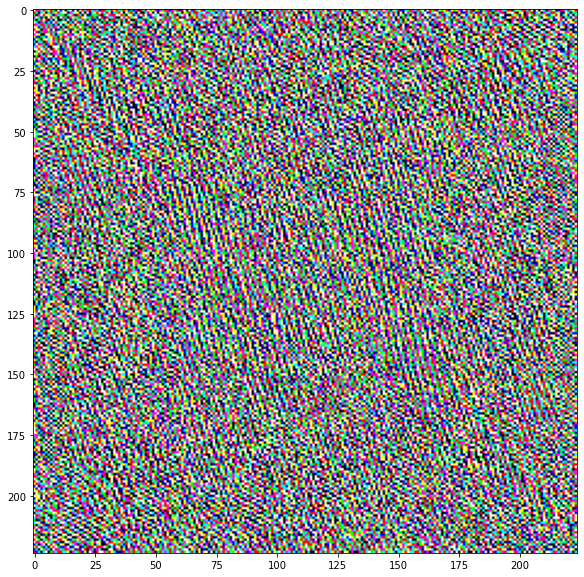

In [85]:
img  = load_img('../images/test_piano.jpg', angle=0, img_shape=(224,224), preprocess=False)
print(img.shape)
y = np.fft.fftn(img)
plt.imshow(y.real)

y.imag= 0
print(y)
#plt.imshow(np.abs(np.fft.ifftn(y)))
